In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [2]:
# Loading the data again.

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

# Take a subset of the data to make plots clearer.
print(df.head())

print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


## Categorical Variables
Many models will only run on numerical values, so it's necessary to create an "x-1" feature, usually a binary, in order to represent the "x" levels of a categorical variable. You can also make indicators to group things together, eg "Nordic countries"

In [3]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


You can also make a numerical value categorical, like age > 65 or not.

In [4]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

# Check to make sure it worked.
print(df['agea'].groupby(features['Adult_65plus']).describe())

               count       mean        std   min   25%   50%   75%    max
Adult_65plus                                                             
0             6682.0  40.874738  13.958596  15.0  29.0  42.0  53.0   64.0
1             1673.0  73.815302   6.650086  65.0  69.0  72.0  78.0  114.0


## Types of continuous variables
Within continuous variables, there are three types: ordinal, interval, and ratio:
- Ordinal variables indicate rank order (eg placing in x place in a race), but does not give the difference in the determining values (eg race time). These are frequently treated like categorical values because the numbers themselves are not that mathematically useful
- Interval variables indicate rank order and distance, such as temperature. For example, distance between 60 and 70 degrees is same as -10, -20. There is no absolute zero point for such variables. As such, you can't make reasonable ratios between them (for example, 60 degrees is not exactly "twice as hot" as 30 degrees)
- Ratio variables indicate rank, distance, and a meaningful absolute zero value. Take age for example. The minimum is zero. 

## Quick drill: categorize each variable in the dataset as categorical or continuous, and the subtype of all continous variables:
- cntry: categorical
- year: continuous, interval (could be used as a categorical, though)
- idno (id number): categorical
- tvtot: continuous, ratio
- ppltrst, pplfair, pplhlp, happy: continuous, ordinal or categorical
- sclmeet, sclact: categorical
- gndr, agea: continuous, ratio
- partner: categorical

## Combining 2 correlated values

In [9]:
print(df.corr())

                 idno          year     tvtot   ppltrst   pplfair    pplhlp  \
idno     1.000000e+00 -8.721796e-18  0.003712 -0.005384  0.007229  0.004432   
year    -8.721796e-18  1.000000e+00 -0.030245 -0.001428  0.003403 -0.031713   
tvtot    3.712135e-03 -3.024491e-02  1.000000 -0.142508 -0.118341 -0.069739   
ppltrst -5.384018e-03 -1.427646e-03 -0.142508  1.000000  0.592001  0.462562   
pplfair  7.228690e-03  3.402583e-03 -0.118341  0.592001  1.000000  0.480918   
pplhlp   4.432144e-03 -3.171310e-02 -0.069739  0.462562  0.480918  1.000000   
happy   -8.842233e-04 -1.666081e-02 -0.119226  0.232736  0.250411  0.214887   
sclmeet -1.815539e-02 -2.403777e-02 -0.083016  0.123828  0.100329  0.077915   
sclact   2.900883e-03  9.550010e-03 -0.098938  0.137425  0.129609  0.091302   
gndr     8.235044e-03 -3.035455e-03  0.016594 -0.030946  0.022259  0.039672   
agea     2.606915e-02 -2.935053e-03  0.262367 -0.033470  0.014135  0.036965   
partner -1.592270e-02  1.681052e-02 -0.025283 -0.037

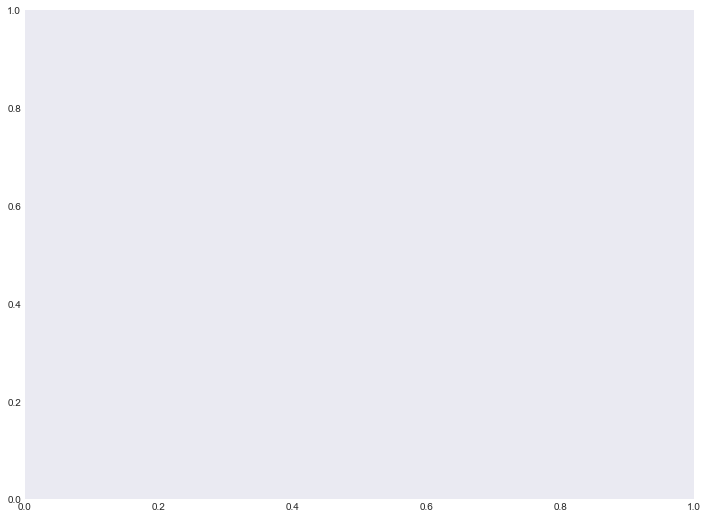

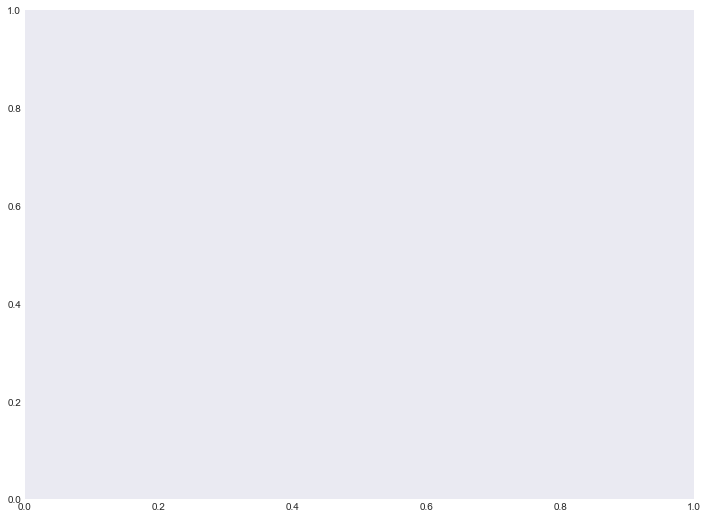

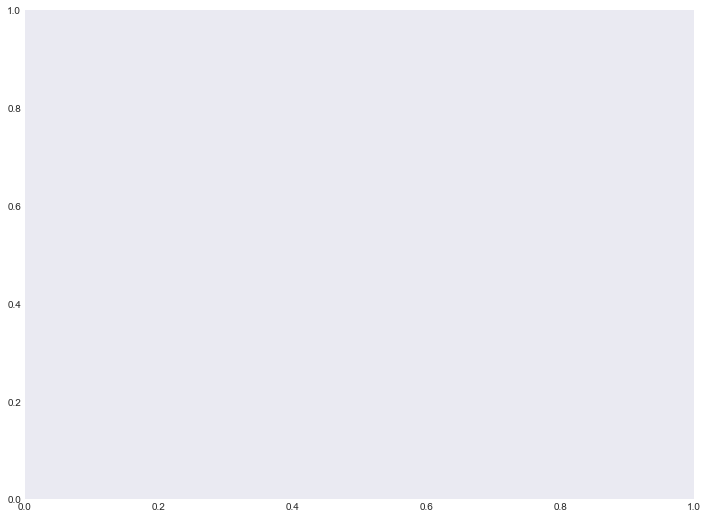

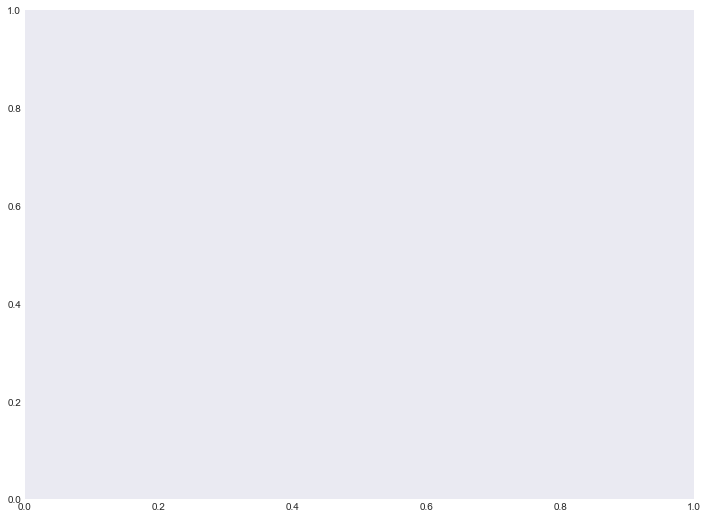

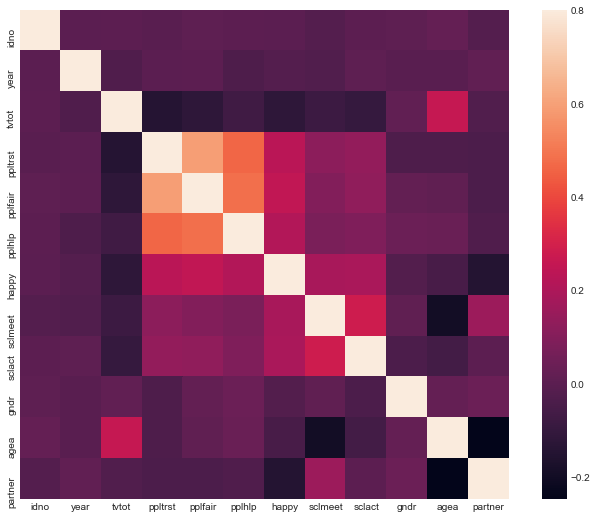

In [28]:
corrmat = df.corr()

#matplotlib figure
f, ax = plt.subplots(figsize=(12,9))
sns.set_style("dark")
sns.set_palette("Pastel1")

#heatmap using sns
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [37]:
# pplfair, ppltrst, and pplhlp are pretty redundant, so we'll get rid of those
# we'll do this by getting the means of each and then having each value be 

means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

Note: mean axis 0 is calculated along the rows, while axis - is along the columns. In the above we're calculating normalized scores for each (by std), and then giving each index one value by averaging the three scores.

In [45]:
print(means)

ppltrst    5.559907
pplfair    6.005143
pplhlp     5.319874
dtype: float64


In [49]:
# next we'll check how well the composite correlates with each of the following variables
plotdf = df.loc[:,['ppltrst','pplfair','pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help']
corrmat2 = plotdf.corr()
print(corrmat2)

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


## Dealing with non-normality
Sometimes you can transform non-normal variables into normal ones useing square roots, inverses, or logs of the variable

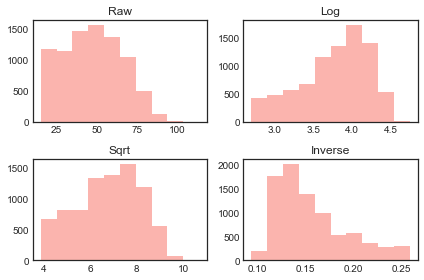

In [58]:
# Doing a bunch of different variations on age to try to get something normal

fig = plt.figure()
sns.set_style("white")

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Sqrt')

fig.add_subplot(224)
plt.hist(np.sqrt(1/df['agea'].dropna()))
plt.title('Inverse')

plt.tight_layout()
plt.show()

#none of these are great but we're gonna use log

features['log_age'] = np.log(df['agea'])

## Creating linear relationships
Many models assume linear relationship between a feature and an outcome. When you want to include a variable that has a non-linear component, you can capture it by using a quadratic, squaring, cubing, or other math operation.

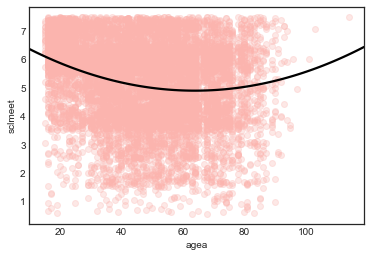

In [59]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['age_squared'] = df['agea'] * df['agea']

## Making variables easier to understand in light of the research question

You can also modify attributes into features that work better in the context of your research question. For example, you can change the happiness variable to a measure of "sadness" in order to show a more illustrative relationship.

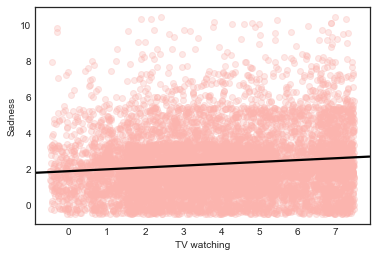

In [60]:
# Reverse-coding the 'happy' variable so that higher scores mean less
# happiness (and thus possibly more sadness).

features['Sadness'] = max(df['happy']) - df['happy']

sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

## Normalizing variables / leveling the playing field
Sometimes this is necessary to do for a model that expects inputs to all have the same scale. Features that vary in range can result in incorrect estimates. This is usually down to a mean of 0 and an std of 1.

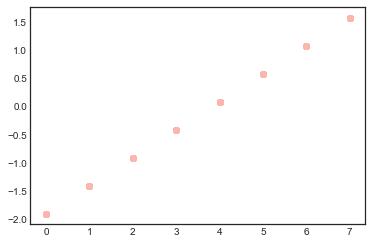

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -6.977221e-18 -5.302688e-16 -5.930638e-17 -8.372665e-17  1.814077e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -9.768109e-17  2.372255e-16 -1.116355e-16 -2.581572e-16  1.186128e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

In [62]:
# If this is the first time you're using scikit-learn you'll first want to do
# pip install sklearn from your terminal to install the package.
from sklearn import preprocessing

# Select only numeric variables to scale. use .select_dtypes to do so
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

## Interactions
Always be conscious of interactions. For example, if you suspect that watching TV only makes people sad if they do it alone, you may want to create a feature to represent that. Like the below:

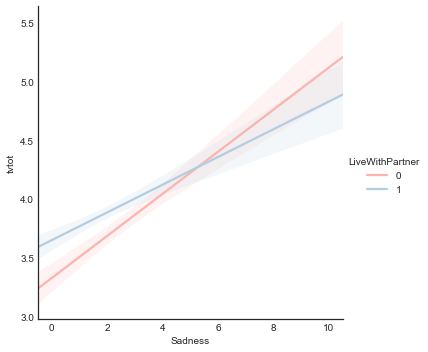

In [63]:
# Create a better indicator for 'partner.' Currently it is coded 1 for
# living with a partner and 2 for not living with a partner.
features['LiveWithPartner'] = np.where(df['partner'] == 1, 1, 0)

# Create the interaction.
features['Sad_Partner'] = features['Sadness'] * features['LiveWithPartner']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['tvtot'] = df['tvtot']
sns.lmplot(
    x='Sadness',
    y='tvtot',
    hue='LiveWithPartner',
    data=features,
    scatter=False
)
plt.show()